In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%run ./split_step_fourier.ipynb

# showing figures inline
%matplotlib inline
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

Text(0.5, 1.0, 'Impulse Responses')

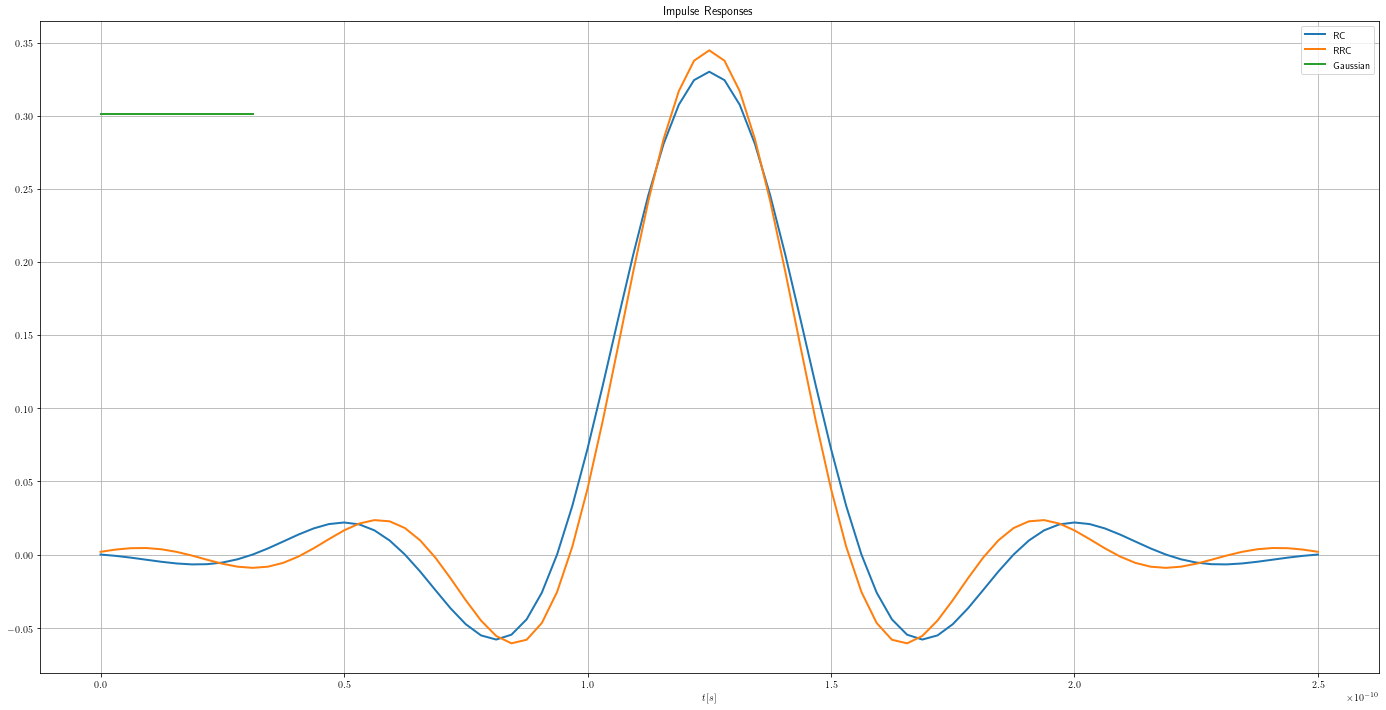

In [2]:
# parameters of the filters
f_symbol = 32e9  # symbol rate (Baud) (Symbols per second)
f_sample = 32e10  # sample rate (Hz) (Samples per second)
n_up = 1 # samples per symbol (>1 => oversampling)

r_rc = .33
r_rrc = .33
r_gaussian = 0.8

syms_per_filt = 4  # symbols per filter (plus minus in both directions)

t_sample_rc, rc = get_rc_ir( syms_per_filt, r_rc, f_symbol, f_sample, n_up )
t_sample_rrc, rrc = get_rrc_ir( syms_per_filt, r_rrc, f_symbol, f_sample, n_up )
t_sample_gaussian, gaussian = get_gaussian_ir( r_gaussian, f_symbol, f_sample, n_up )

matplotlib.rc('figure', figsize=(24, 12) )

plt.plot( np.arange(rc.size)*t_sample_rc, rc, linewidth=2.0, label='RC' )
plt.plot( np.arange(rrc.size)*t_sample_rrc, rrc, linewidth=2.0, label='RRC' )
plt.plot( np.arange(gaussian.size)*t_sample_gaussian, gaussian, linewidth=2.0, label='Gaussian' )

plt.grid( True )
plt.legend( loc='upper right' )
plt.xlabel('$t[s]$')
plt.title( 'Impulse Responses' )

Text(0.5, 1.0, 'Impulse Responses')

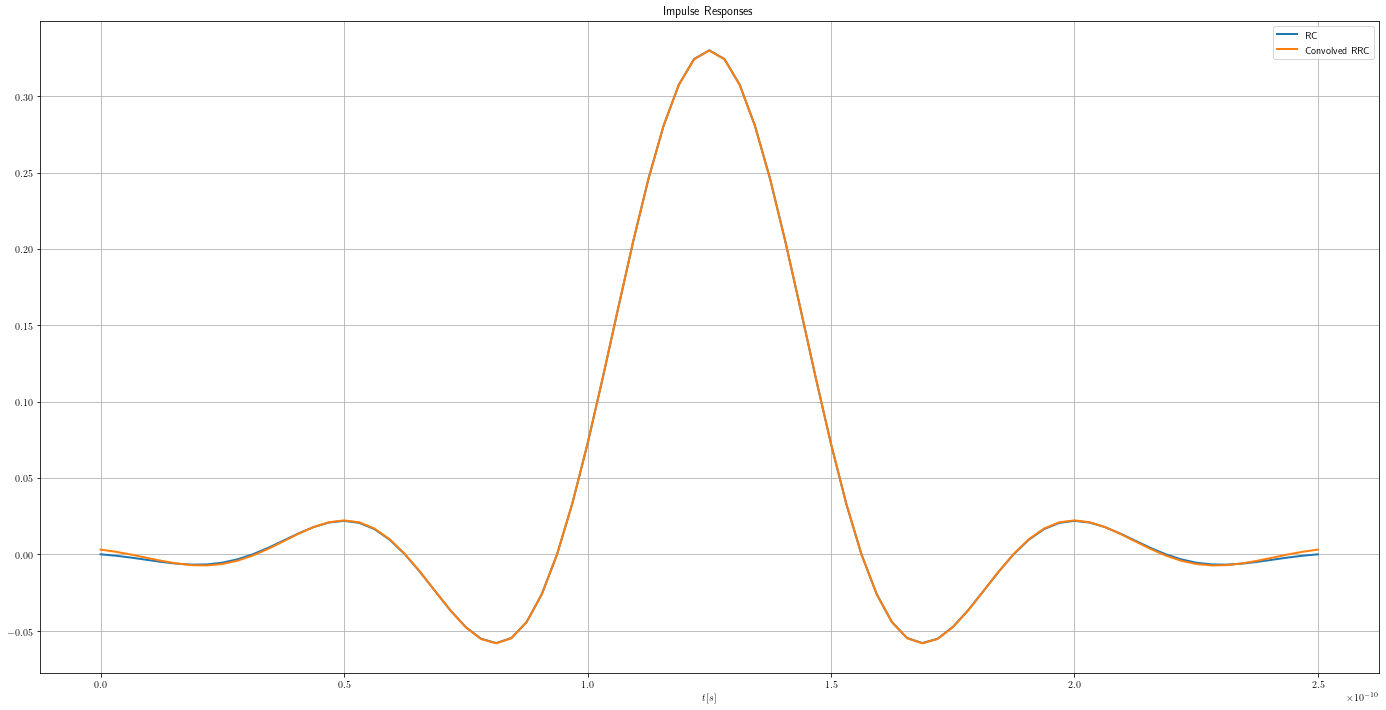

In [3]:
# Comparison of convolved rrc with rc

t_rc, rc = get_rc_ir( syms_per_filt, r_rc, f_symbol, f_sample, n_up )
t_rrc, rrc = get_rrc_ir( syms_per_filt, r_rrc, f_symbol, f_sample, n_up )

rrc_convolved = np.convolve(rrc, rrc, mode='same')
rrc_convolved /= np.linalg.norm(rrc_convolved)

matplotlib.rc('figure', figsize=(24, 12) )

plt.plot( np.arange(rc.size)*t_sample_rc, rc , linewidth=2.0, label='RC' )
plt.plot( np.arange(rrc_convolved.size)*t_sample_rrc, rrc_convolved, linewidth=2.0, label='Convolved RRC')

plt.grid( True )
plt.legend( loc='upper right' )
plt.xlabel('$t[s]$')
plt.title( 'Impulse Responses' )


Text(0.5, 1.0, 'Modulation Gaus')

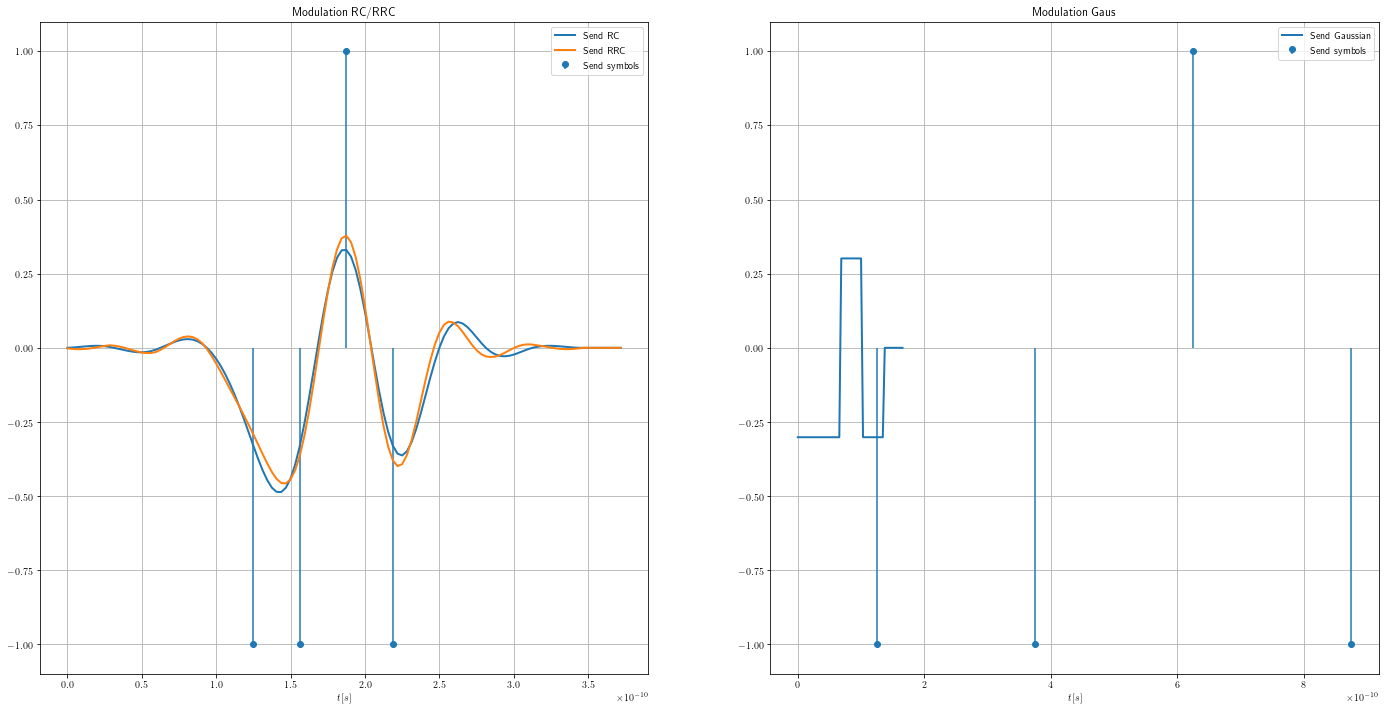

In [4]:
# modulation scheme and constellation points
M = 2
modulation = {'0': -1, '1': 1}

n_symbol = 4  # number of symbols

# Signalfolge generieren
send_bits = np.random.choice([symbol for symbol in modulation.keys()], size=n_symbol)

send_rc = generate_signal(modulation, send_bits, rc, syms_per_filt)
send_rrc = generate_signal(modulation, send_bits, rrc, syms_per_filt)
send_gaussian = generate_signal(modulation, send_bits, gaussian, 0)

matplotlib.rc('figure', figsize=(24, 12) )

plt.subplot(121)
plt.plot( np.arange(send_rc.size)*t_sample_rc, send_rc, linewidth=2.0, label='Send RC' )
plt.plot( np.arange(send_rrc.size)*t_sample_rrc, send_rrc, linewidth=2.0, label='Send RRC' )
plt.stem( np.arange(n_symbol/f_symbol, step=1/f_symbol)+syms_per_filt/f_symbol, [ modulation[str(symbol)] for symbol in send_bits ], label='Send symbols', use_line_collection=True, basefmt=' ')

plt.grid( True )
plt.ylim(-1.1, 1.1)
plt.xlabel('$t[s]$')
plt.legend( loc='upper right' )
plt.title( 'Modulation RC/RRC' )

plt.subplot(122)
plt.plot( np.arange(send_gaussian.size)*t_sample_gaussian, send_gaussian, linewidth=2.0, label='Send Gaussian' )
plt.stem( np.arange(8*n_symbol/f_symbol, step=8/f_symbol)+syms_per_filt/f_symbol, [ modulation[str(symbol)] for symbol in send_bits ], label='Send symbols', use_line_collection=True, basefmt=' ')

plt.grid( True )
plt.ylim(-1.1, 1.1)
plt.xlabel('$t[s]$')
plt.legend( loc='upper right' )
plt.title( 'Modulation Gaus' )


[ 0.00000000e+00  1.67551608e+10  3.35103216e+10  5.02654825e+10
  6.70206433e+10  8.37758041e+10  1.00530965e+11  1.17286126e+11
  1.34041287e+11  1.50796447e+11  1.67551608e+11  1.84306769e+11
  2.01061930e+11  2.17817091e+11  2.34572251e+11  2.51327412e+11
  2.68082573e+11  2.84837734e+11  3.01592895e+11  3.18348056e+11
  3.35103216e+11  3.51858377e+11  3.68613538e+11  3.85368699e+11
  4.02123860e+11  4.18879020e+11  4.35634181e+11  4.52389342e+11
  4.69144503e+11  4.85899664e+11  5.02654825e+11  5.19409985e+11
  5.36165146e+11  5.52920307e+11  5.69675468e+11  5.86430629e+11
  6.03185789e+11  6.19940950e+11  6.36696111e+11  6.53451272e+11
  6.70206433e+11  6.86961594e+11  7.03716754e+11  7.20471915e+11
  7.37227076e+11  7.53982237e+11  7.70737398e+11  7.87492558e+11
  8.04247719e+11  8.21002880e+11  8.37758041e+11  8.54513202e+11
  8.71268363e+11  8.88023523e+11  9.04778684e+11  9.21533845e+11
  9.38289006e+11  9.55044167e+11  9.71799328e+11  9.88554488e+11
 -1.00530965e+12 -9.88554

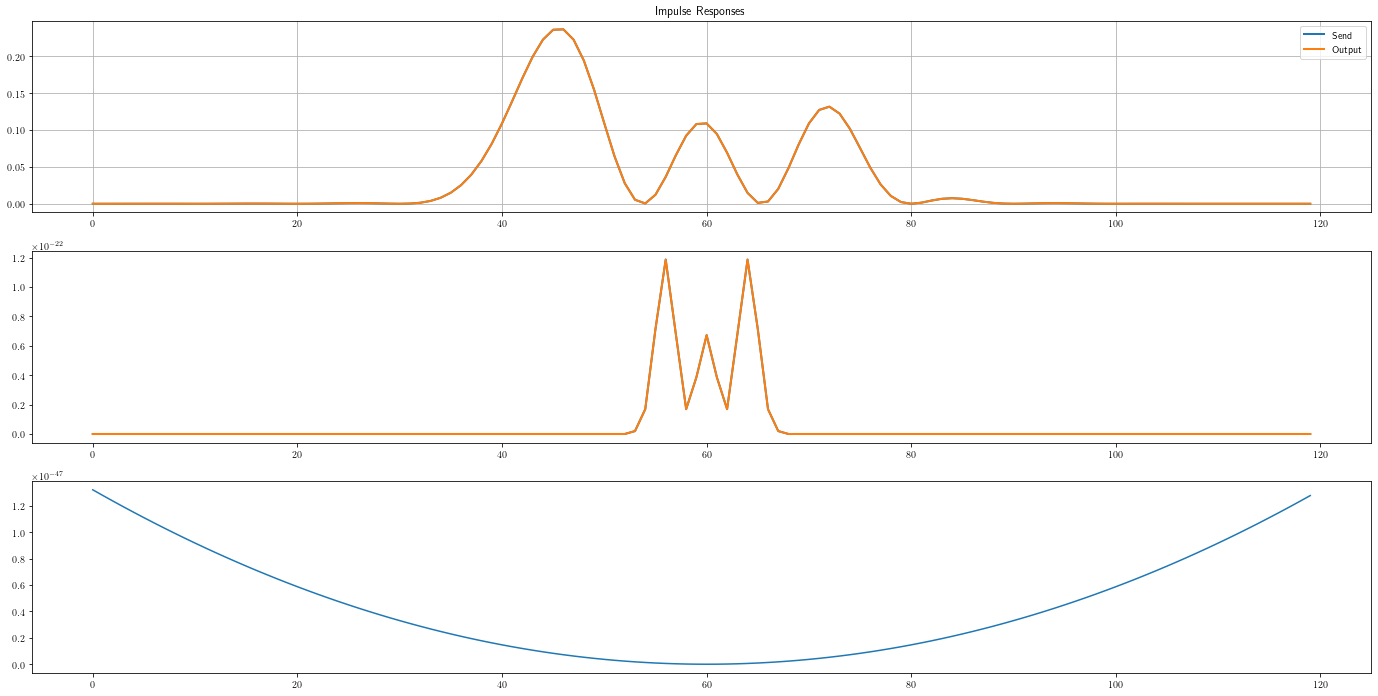

In [5]:
# Transmission
%run split_step_fourier.ipynb


z_length = 5000
nz = 10
dz = z_length / nz

alpha = 0  # Dämpfung (dB/km)
D = 17  # ps/nm/km
beta2 = -np.square(1550e-9) * ( D * 1e-6 ) / ( 2 * np.pi * 3e8)  # propagation constant
gamma = 0 # ps/km

output, linop = splitstepfourier(send_rc, t_sample_rc, dz, nz, alpha, beta2, gamma)

matplotlib.rc('figure', figsize=(24, 12) )

plt.subplot(311)
plt.plot( np.square(abs(send_rc)), linewidth=2.0, label='Send' )
plt.plot( np.square(abs(output)), linewidth=2.0, label='Output' )

plt.grid( True )
plt.legend( loc='upper right' )
plt.title( 'Impulse Responses' )

plt.subplot(312)
plt.plot( np.fft.fftshift(np.square(abs(t_sample_gaussian*np.fft.fft(send_rc)/np.sqrt(2*np.pi)))), linewidth=2.0, label='Send' )
plt.plot( np.fft.fftshift(np.square(abs(t_sample_gaussian*np.fft.fft(output)/np.sqrt(2*np.pi)))), linewidth=2.0, label='Output')

plt.subplot(313)
plt.plot( np.fft.fftshift(np.angle(linop)))